In [3]:
import sys
sys.path.append('/home/felipe/python_envs/env_felipe/lib/python3.8/site-packages')

In [5]:
import flim
from flim.experiments import utils
from flim.models.lcn import LCNCreator

import torch

import numpy as np

import matplotlib.pyplot as plt

/home/felipe/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [5]:
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    deice = 'cpu'

/home/felipe/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [7]:
architecture = utils.load_architecture('arch.json')

In [8]:
# the images are in LAB color space and have
images, markers = utils.load_images_and_markers('images_and_markers')

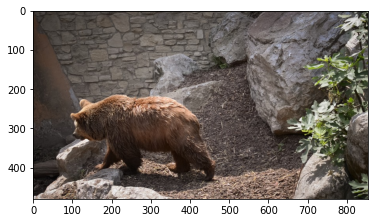

In [9]:
plt.imshow(utils.image_to_rgb(images[0]))

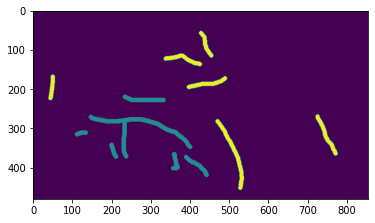

In [10]:
plt.imshow(markers[0])

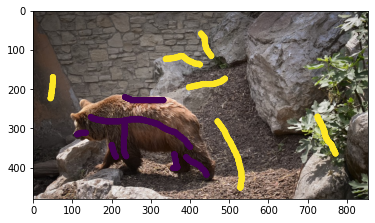

In [11]:
plt.imshow(utils.image_to_rgb(images[0]))

x, y = np.where(markers[0] != 0)

plt.scatter(y, x, s=1, c=markers[0, x, y])


In [9]:
# relabel_markers=True will set a new label for each connected component in the markers
creator = LCNCreator(architecture, images=images, markers=markers, relabel_markers=False, device=device)

In [10]:
# Build the feature extractor using FLIM
creator.build_feature_extractor()

Building conv
Number of patches 14920
Building activation
Building pool
Building norm1


In [11]:
# model is a PyTorch Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
model = creator.get_LIDSConvNet()

In [12]:
# input mut be a PyTorch Tensor with shape (N, C, H, W)
x = torch.from_numpy(images).permute(0, 3, 1, 2).float().to(device)

In [13]:
features = model.forward(x)

In [14]:
print(features.size())

torch.Size([1, 128, 480, 854])


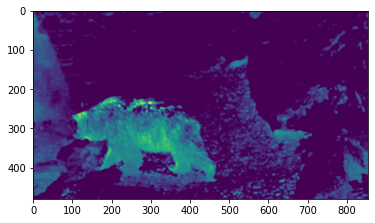

In [15]:
plt.imshow(features[0, 0, :].detach().cpu())